In [1]:
include("VMC/includeall.jl")
using BenchmarkTools: @btime
using Plots

In [18]:
# Setting up the physical parameters for the system
dims = 3
num = 10
HOshape = [1, 1, 1]
ham = HarmonicOscillator(1, HOshape)

# Setting up the sampling algorithm
metro = Importance(1e4, 1e7, 0.1)
#metro = Metropolis(1e4, 1e7, 0.1)

# Setting the optimization or statistical run scheme
# This decides what extra calculations are done after the vmc calculation, and what values are sampled during
scheme = OneBody(dims, num, start = 0, stop = 4, length = 101)

nthreads = 12

12

In [19]:
wf = SimpleGaussian(0.5, HOshape)
@time sg_result = run_scheme(wf, ham, metro, dims, num, nthreads, scheme);

  2.269448 seconds (70.48 M allocations: 4.051 GiB, 45.30% gc time)


In [20]:
wf = Correlated(0.49744, 0.00433, HOshape)
@time cr_result = run_scheme(wf, ham, metro, dims, num, nthreads, scheme);

  3.060104 seconds (90.72 M allocations: 4.954 GiB, 43.85% gc time)


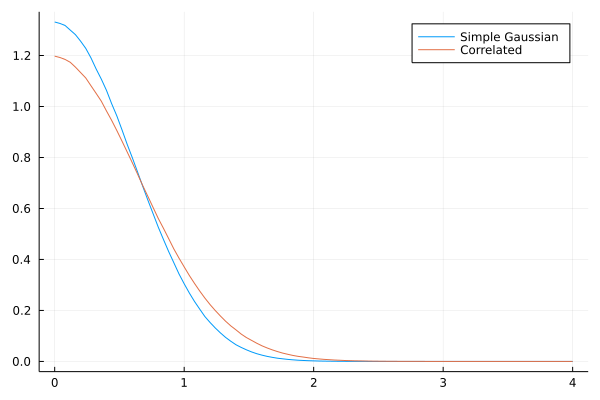

In [21]:
plot(sg_result.radius, sg_result.oneBodyDensity, label = "Simple Gaussian")
plot!(cr_result.radius, cr_result.oneBodyDensity, label = "Correlated")